In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib as mpl

In [92]:
path = '../background/hyperparameters.xlsx'
df = pd.read_excel(path, header=1)
df.head()

,Note,Citation,Protein,Hyperparameter,Value,units,MSM?,Novel?,Uses optimisation
0,NaN,Computing_2019,Villin,TICA lag,50,ns,True,False,False
1,NaN,Computing_2019,Villin,TICA m,2,NaN,True,False,False
2,NaN,Computing_2019,Villin,feature,all-dihedrals,NaN,True,False,False
3,NaN,Computing_2019,Villin,clustering method,regular grid,NaN,True,False,False
4,NaN,Computing_2019,Villin,clustering n,625,NaN,True,False,False


In [83]:
mlags = df.loc[df.Hyperparameter=='Markov lag time', ['Citation', 'Protein', 'Value', 'units']]

In [142]:
feats = df.loc[df.Hyperparameter=='feature', ['Citation', 'Protein', 'Value']]

feats = (feats.join(
    feats.Value.str
    .split(pat=',')
    .apply(pd.Series))
    .drop(['Value'], axis=1)
    .melt(id_vars=['Citation', 'Protein'], value_name='Feature')
    .drop(['variable'], axis=1)
    .dropna())
feats.Feature = feats.Feature.str.strip()
feats.head()

,Citation,Protein,Feature
0,Computing_2019,Villin,all-dihedrals
1,Data-drive2018,NTL9,contact-map
2,A_Data-Dri2018,NTL9,closest-distances
3,A_Data-Dri2018,WW-domain,closest-distances
4,Learning_E2018,WW-domain,alpha-distances


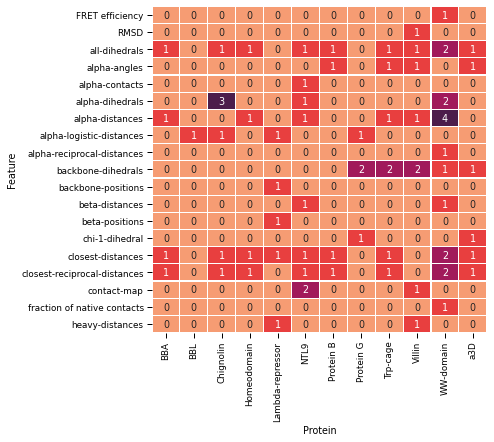

In [143]:
feat_counts = (feats.groupby(['Protein', 'Feature'])
               .count().reset_index()
               .sort_values(by='Citation', ascending=False)
               .rename(columns={'Citation': 'N'})
              .pivot(index='Protein', columns='Feature', values='N')
              .fillna(value=0))

cols = sns.color_palette("rocket", 4)[::-1]

with sns.plotting_context('paper'):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(feat_counts.T, linewidths=0.1, ax=ax, cmap=cols, annot=True, cbar=False)

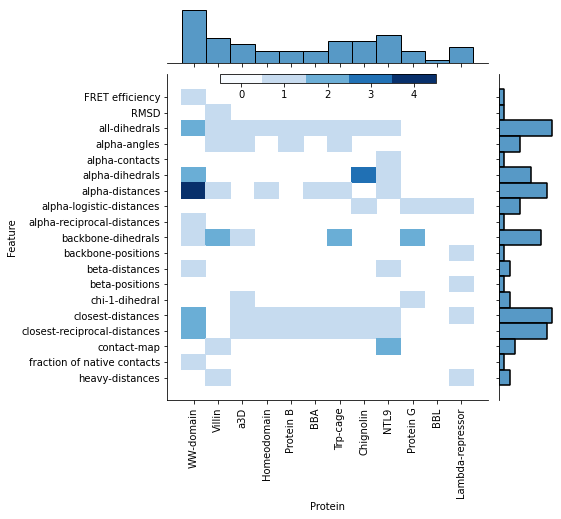

In [230]:
feats.sort_values(by=['Feature'], inplace=True)

with sns.plotting_context():
    g = sns.JointGrid()
    x, y = feats['Protein'], feats['Feature']

    sns.histplot(x=x,ax=g.ax_marg_x)
    sns.histplot(y=y,ax=g.ax_marg_y)
    sns.histplot(x=x, y=y, ax=g.ax_joint, cmap='Blues')

    cmap = mpl.cm.Blues
    bounds = [0, 1, 2, 3, 4, 5]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='neither')
    cbar_ax = g.fig.add_axes([0.2,0.8, 0.5, 0.02])
    cb2 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                    cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal', 
                                   ticks=mpl.ticker.FixedLocator([0.5, 1.5, 2.5, 3.5, 4.5]), 
                                   format=mpl.ticker.FixedFormatter([0, 1, 2, 3, 4]))


    g.fig.axes[0].tick_params(axis='x', labelrotation=90)